In [7]:
import os
import sys
import math
import random
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator, AutoMinorLocator

In [8]:
root_path = "E:\\Tasks\\10. Data Gathering wsns\\data-gathering-ai-simple-design\\data\\experiments\\experiment_1"
input_path = os.path.join(root_path, "input")
# base_stations.csv, environment_basics.csv, sensors.csv, uavs.csv, way_points.csv
output_path = os.path.join(root_path, "output", "12389883")
# agent_rewards.csv
performance_path = os.path.join(root_path, "performance")
methods_paths = ["GreedyForwarding.log.csv", "NoForwarding.log.csv", "QLearningForwarding.log.csv", "RandomForwarding.log.csv"]
methods_name = ["GreedyForwarding", "NoForwarding", "QLearningForwarding", "RandomForwarding"]
Metrix_name = ["pdr", "delay"]

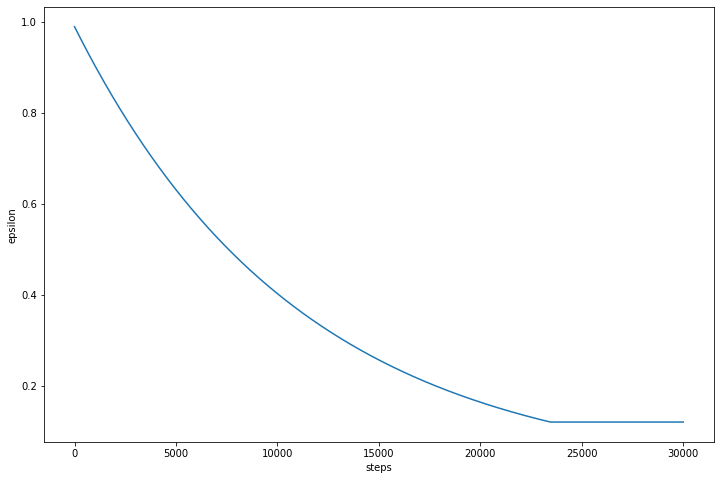

In [9]:
epsilon = 0.99
epsilon_decay = 0.00009
min_epsilon = 0.12
e = []
N = 300*100
for i in range(N):
    if epsilon >= min_epsilon:
        epsilon -= epsilon*epsilon_decay
    e.append(epsilon)
x = [ i for i in range(N)]
plt.figure(figsize=(12, 8))
plt.plot(range(N), e,label=f'epsilon decay policy')
plt.xlabel('steps')
plt.ylabel('epsilon')
plt.savefig(os.path.join(performance_path, 'epsilon.png'))
plt.savefig(os.path.join(performance_path, 'epsilon.svg'), format='svg')
plt.show()

In [10]:
def Results_plot(result, method_name, x_label, y_label, save_path=root_path, step=5, vline_x=None):
    plt.figure(figsize=(12, 8))
    # plt.title(method_name[0])
    for i, res in enumerate(result):
        x = np.arange(step, len(res) + step, step)
        y = res[::step]
        plt.plot(x, y, label=method_name[i])
        plt.scatter(x, y, s=20)
    plt.legend(loc="best")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    ax = plt.gca()
    ax.locator_params(axis='y', nbins=10)
    ax.yaxis.set_major_locator(MaxNLocator(nbins=10))
    num_ticks = 10 
    ax.xaxis.set_major_locator(plt.MaxNLocator(num_ticks))
    ax.xaxis.set_major_formatter(plt.ScalarFormatter(useOffset=False, useMathText=True))
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    plt.xticks(rotation=45, fontsize='xx-small')
    plt.grid()
    if vline_x is not None:
        plt.axvline(x=vline_x, color='r', linestyle='--', label='Test')
    plt.savefig(os.path.join(save_path, y_label+ '.png'))
    plt.savefig(os.path.join(save_path, y_label+ '.svg'), format='svg')
    plt.show()

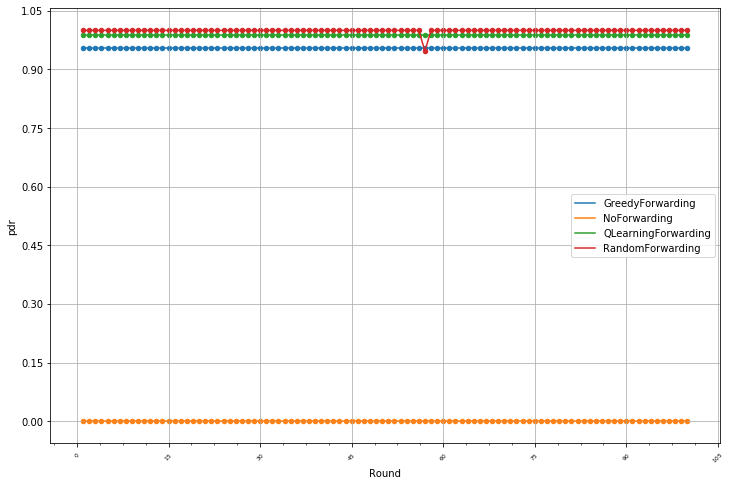

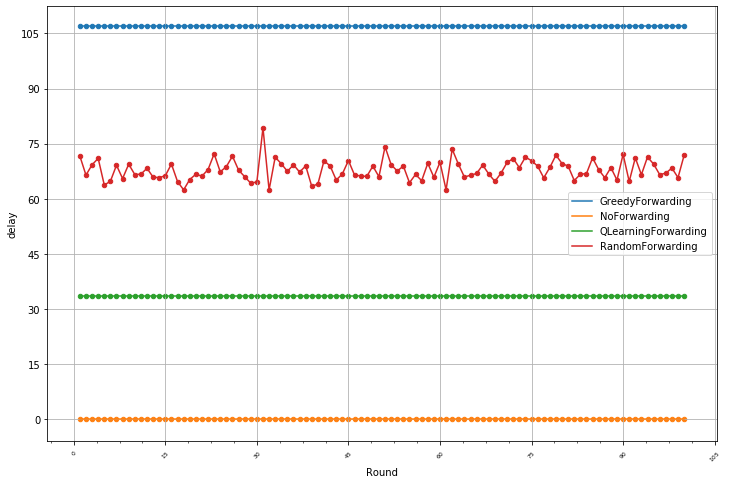

In [13]:
results1, results2 = [], []
for m_path in methods_paths:
    df = pd.read_csv(os.path.join(performance_path, m_path))
    results1.append(df[Metrix_name[0]].tolist())
    results2.append(df[Metrix_name[1]].tolist())

Results_plot(results1, methods_name, "Round", Metrix_name[0], performance_path, 1)
Results_plot(results2, methods_name, "Round", Metrix_name[1], performance_path, 1)

In [52]:
def plot_rewards(result, agents_name, x_label, y_label, save_path=root_path, chunk_size=5):
    t_rewards_list = result
    for ii in range(len(result)+1):
        plt.figure(figsize=(12, 8))
        if ii >= len(result):t_rewards_list = result
        else:t_rewards_list = [result[ii]]
        for idx, rewards in enumerate(t_rewards_list):
            # data_mean = np.mean(rewards)
            # data_std = np.std(rewards)
            # rewards = list((rewards - data_mean) / data_std)
            y_points = np.array([])
            for chunk in range(len(rewards) // chunk_size):
                avg = np.sum(rewards[chunk * chunk_size: chunk * chunk_size + chunk_size]) / chunk_size
                y_points = np.append(y_points, avg)
            x_points = np.arange(0, len(rewards) // chunk_size)
            for i in range(len(x_points)):
                x_points[i] += 1
            
            label=f'Agent {idx + 1}'
            if ii < len(result):label=f'Agent {idx + ii + 1}'
            
            line, = plt.plot(x_points, y_points, label=label)
        
            plt.title('Agents rewards')
            plt.legend(loc='best')
            plt.xlabel(x_label)
            plt.ylabel(y_label)
        if len(result)<=ii:label=""
        plt.savefig(os.path.join(save_path, 'Reward '+ label + '.png'))
        plt.savefig(os.path.join(save_path, 'Reward '+ label +'.svg'), format='svg')
        plt.show()

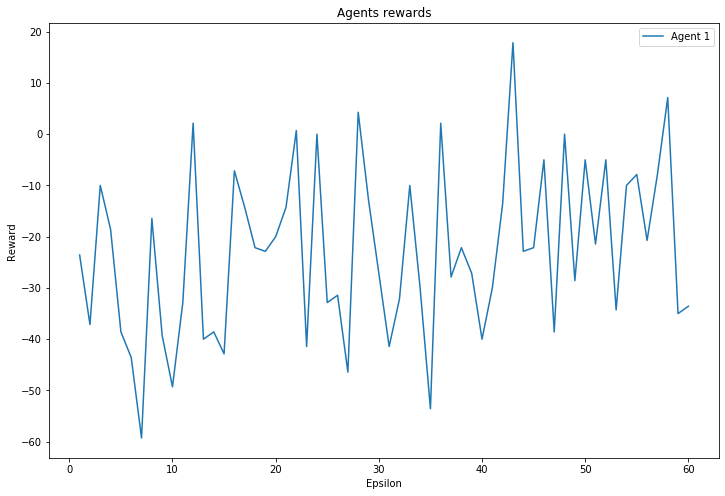

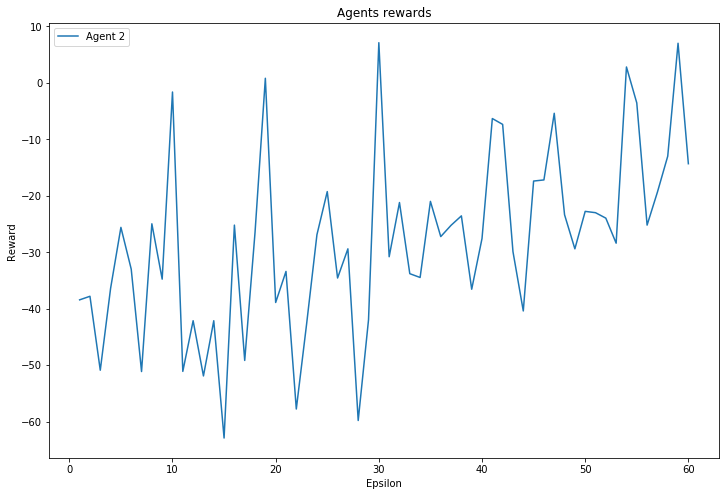

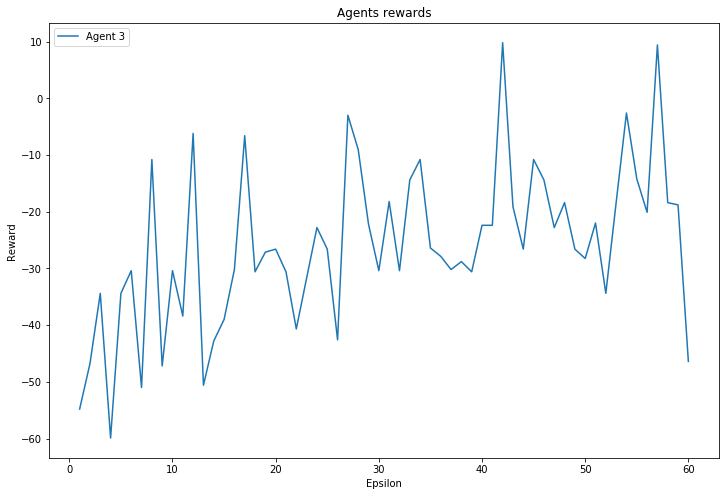

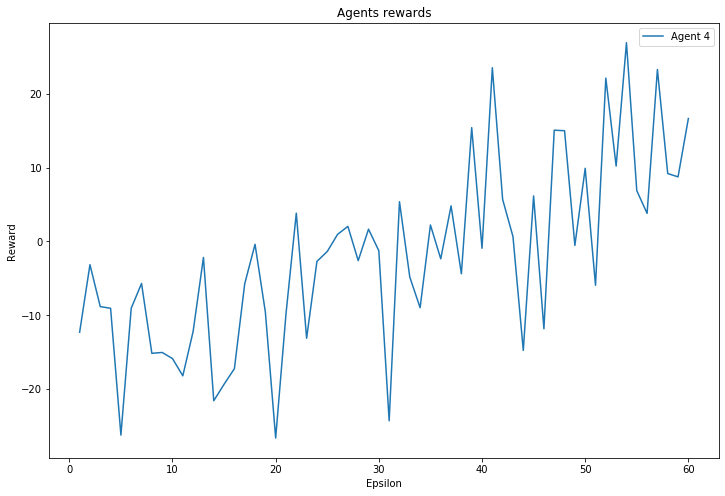

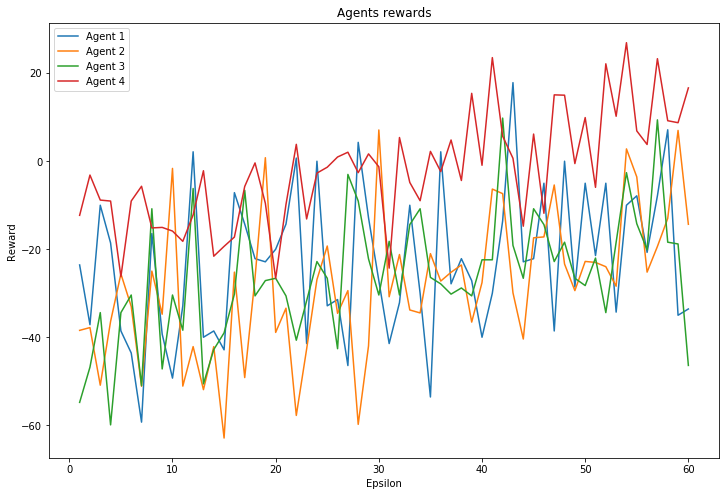

In [53]:
agents_name = ["agent-1", "agent-2", "agent-3", "agent-4"]
reward = []
for agent in agents_name:
    df = pd.read_csv(os.path.join(output_path, "agent_rewards.csv"))
    reward.append(df[agent].tolist())

plot_rewards(reward, agents_name, "Epsilon", "Reward", output_path, 5)